##  Estimating 1D integrals 

Generate random numbers from the distribution $f(x) = \frac{2}{\pi}cos^2{x}$

Envelope 1 is uniform distribution $\frac{1}{\pi}$

Envelope 2 is the beta distribution with paramaters a = 2 and b = 2

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import beta

sns.set_context('poster')

mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

In [2]:
prng = np.random.default_rng()

def envelope_uniform():
    
    # set M = 2
    
    return prng.uniform(low = -math.pi/2, high = math.pi/2)

def envelope_beta(n):
    
    # set M = 1.4
    
    return beta.rvs(2, 2, loc = -math.pi/2, scale = math.pi, size = n)


In [3]:
# Initialize random number generator
def rejection_I(nsample):

# let's use rejection sampling to generate the random numbers

    isample = 0
    x_is    = np.zeros(nsample)

    # Function that computes 4x^3
    f_of_x   = lambda x: (2/math.pi)*np.cos(x)**2

    g_of_x   = lambda x: 1/math.pi

    attempts = 0

    while isample < nsample:

        attempts += 1

        # Generate z from u(x)
        z = envelope_uniform()

        # Random number between 0 and 1
        h = prng.random()

        # Rejection step

        if h < f_of_x(z)/(2 * g_of_x(z)):
            x_is[isample] = z
            isample += 1

    print('Attempts per random number from f(x) = ', attempts/nsample)

    return x_is

Attempts per random number from f(x) =  2.0062


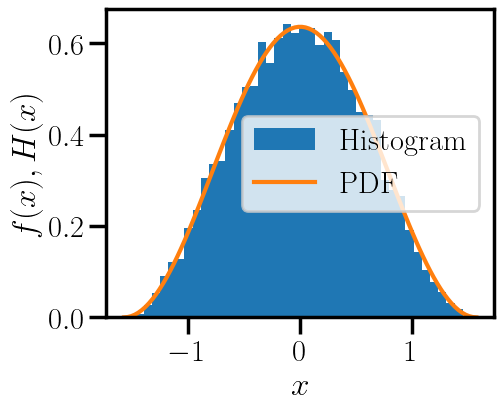

In [4]:
f_of_x   = lambda x: (2/math.pi)*np.cos(x)**2

# Plot result
x    = np.linspace(-math.pi/2,math.pi/2,100)

fig, ax = plt.subplots(figsize = (5,4))

ax.hist(rejection_I(10000), bins=40, density=True, label='Histogram')

ax.plot(x, f_of_x(x), label='PDF')
ax.legend()

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x), H(x)$')
plt.show()

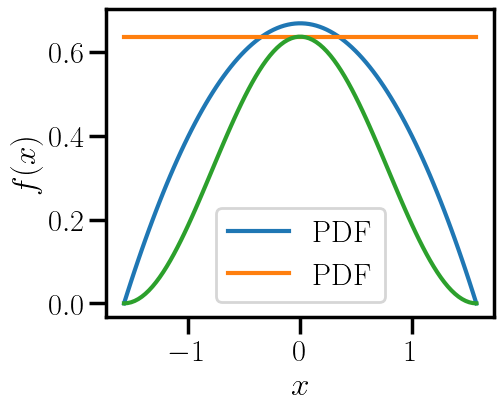

In [5]:
from scipy.stats import beta

x    = np.linspace(-math.pi/2,math.pi/2,100)

fig, ax = plt.subplots(figsize = (5,4))

ax.plot(x, 1.4*beta.pdf(x, 2, 2, loc = -math.pi/2, scale = math.pi), label='PDF')
ax.plot(x, (2/math.pi)*np.ones(len(x)), label='PDF')

ax.legend()

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.plot(x, f_of_x(x), label='PDF')
plt.show()

In [6]:
# Initialize random number generator

def rejection_II(nsample):
    # let's use rejection sampling to generate the random numbers

    isample = 0
    x_is    = np.zeros(nsample)

    # Function that computes 4x^3
    f_of_x   = lambda x: (2/math.pi)*np.cos(x)**2

    g_of_x   = lambda x: beta.pdf(x, 2, 2, loc = -math.pi/2, scale = math.pi)

    attempts = 0

    h_is = prng.uniform(size = int(nsample * 1.5))
    z_is = envelope_beta(int(nsample * 1.5))
    
    while isample < nsample:

        # Generate z from u(x)
        z = z_is[attempts]
        
        # Random number between 0 and 1
        h = h_is[attempts]

        attempts += 1 
        # Rejection step

        if h < f_of_x(z)/(1.4 * g_of_x(z)):
            x_is[isample] = z
            isample += 1

    print('Attempts per random number from f(x) = ', attempts/nsample)
    
    return x_is
        


Attempts per random number from f(x) =  1.3983


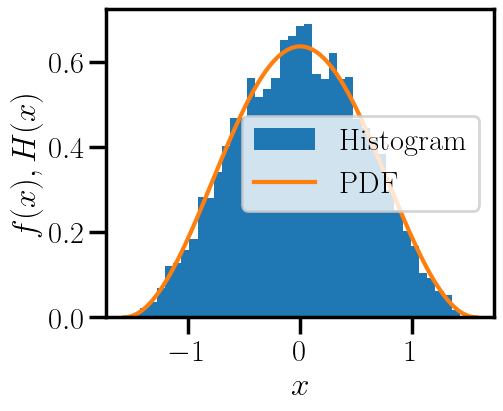

In [7]:
f_of_x   = lambda x: (2/math.pi)*np.cos(x)**2

# Plot result
x    = np.linspace(-math.pi/2,math.pi/2,100)

fig, ax = plt.subplots(figsize = (5,4))

ax.hist(rejection_II(10000), bins=40, density=True, label='Histogram')
ax.plot(x, f_of_x(x), label='PDF')
ax.legend()

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x), H(x)$')
plt.show()

In [8]:
# Array that holds different values of N
N = np.array([10**x for x in range(3,8)])

# Arrays to hold estimates and standard errors
e = []; s = []

# This value is from Wolfram Alpha. It is exact upto numerical precision
truth    = (math.pi**2 - 6)/12

# Repeat integration for different values of N
for nsamples in N:

    # Get uniform random numbers between a , b
    x_is = rejection_II(nsamples) 

    # For each random number x_i, compute x_i*x_i - this is an array operation
    h_of_xis = x_is*x_is

    # From LLN
    estimate = np.sum(h_of_xis)/nsamples

    # Relative error computed from the true value and the estimate
    rel_error = (abs(estimate - truth)/truth) * 100

    # Estimate standard error
    std_error = np.sqrt(np.var(h_of_xis, ddof = 1) / nsamples)
    
    print("Truth: ", f"{truth:e}"," Estimate : ", f"{estimate:e}", f"Rel Error {rel_error:e}")
    
    e.append(estimate)
    s.append(std_error)


Attempts per random number from f(x) =  1.37
Truth:  3.224670e-01  Estimate :  3.236935e-01 Rel Error 3.803405e-01
Attempts per random number from f(x) =  1.4036
Truth:  3.224670e-01  Estimate :  3.241081e-01 Rel Error 5.089037e-01
Attempts per random number from f(x) =  1.39951
Truth:  3.224670e-01  Estimate :  3.206688e-01 Rel Error 5.576361e-01
Attempts per random number from f(x) =  1.400751
Truth:  3.224670e-01  Estimate :  3.222229e-01 Rel Error 7.570483e-02
Attempts per random number from f(x) =  1.4002774
Truth:  3.224670e-01  Estimate :  3.227090e-01 Rel Error 7.504403e-02


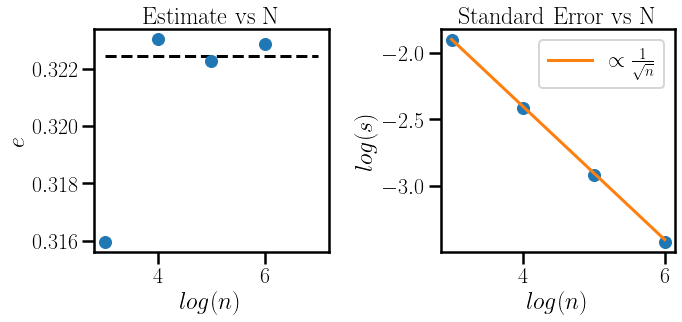

In [33]:
# Plot results
fig, ax = plt.subplots(1, 2, figsize=(10,5))
    
ax[0].set_title('Estimate vs N')    
ax[1].set_title('Standard Error vs N')    

ax[0].set_ylabel(r'$e$')
ax[0].set_xlabel(r'$log(n)$')
ax[0].plot(np.log10(N), e,'o')
ax[0].hlines(y=truth, xmin = 3, xmax = 7, linestyle='--', color='black')

ax[1].set_ylabel(r'$log(s)$')
ax[1].set_xlabel(r'$log(n)$')
ax[1].plot(np.log10(N), np.log10(s),'o')

ax[1].plot(np.log10(N), -np.log10(np.sqrt(N))-0.4, label=r'$\propto \frac{1}{\sqrt{n}}$')
ax[1].legend(loc='best')
plt.tight_layout()
plt.show()